### Description

Predicting wine quality base on its chemical features

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [3]:
dataset = pd.read_csv("../data/winequality-red.csv",sep=";")


In [4]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Categorize quality

In [6]:
def convert_to_cat(value):
    
    if value < 4:
        return "really bad"
    elif value >=4 and value < 6:
        return "normal"
    elif value >=6 and value < 8.5:
        return "good"
    else:
        return "excellent"
    
dataset["quality"] = dataset["quality"].apply(convert_to_cat)
dataset= dataset[dataset["quality"]!="really bad"]
dataset["quality"].value_counts()
Y = dataset["quality"]

### Check correlation

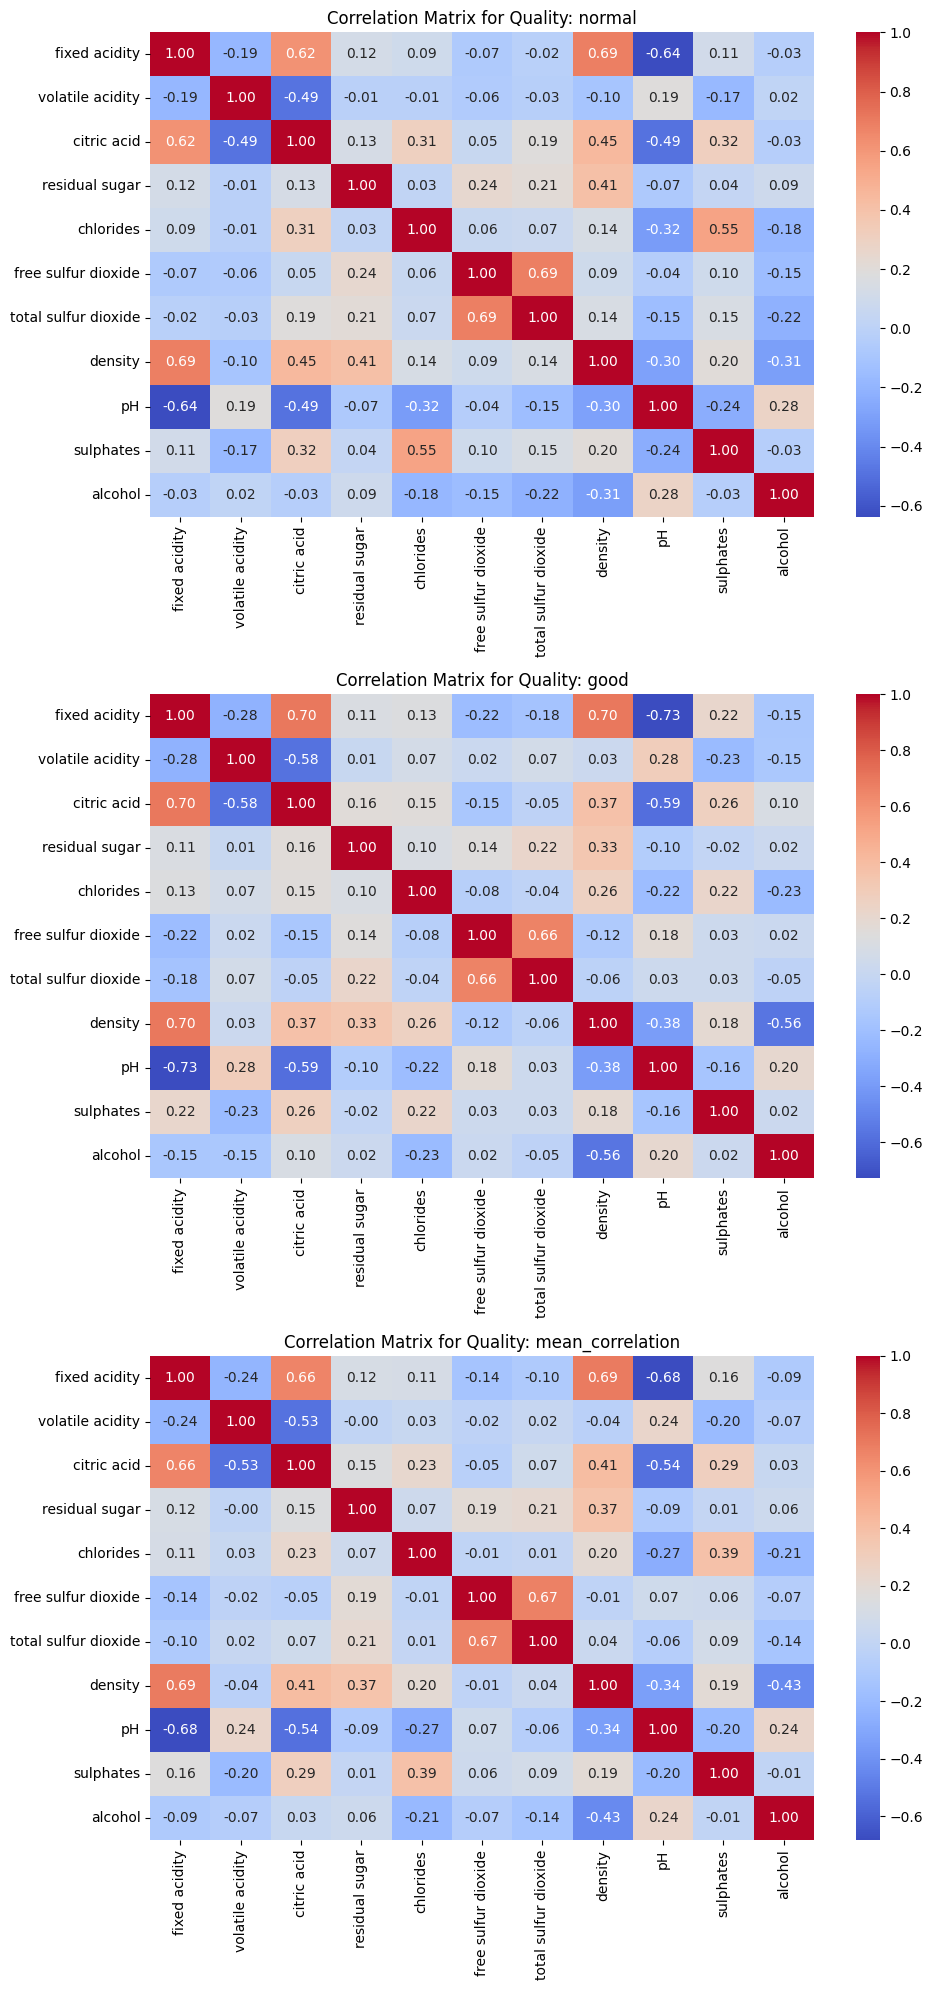

In [7]:
correlation_matrices = {}

for quality in dataset["quality"].unique():
    quality_df = dataset[dataset["quality"] == quality]
    correlation_matrix = quality_df.drop("quality",axis=1).corr(method="pearson")
    correlation_matrices[quality] = correlation_matrix


correlation_matrices["mean_correlation"] =( correlation_matrices["normal"] + correlation_matrices["good"]) /2
plt.figure(figsize=(10,20))
i=1
for quality,matrix in correlation_matrices.items():
    plt.subplot(3,1,i)

    sns.heatmap(matrix,annot=True,fmt=".2f",cmap="coolwarm")
    plt.title(f'Correlation Matrix for Quality: {quality}')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    i+=1

plt.tight_layout()
plt.show()

### Choose features

In [8]:
dataset.drop(["quality"],axis=1,inplace=True)

In [15]:



X_train,X_test,Y_train,Y_test = train_test_split(dataset,Y,test_size=0.3,random_state=4)


gnb = GaussianNB()

gnb.fit(X_train,Y_train)

y_pred = gnb.predict(X_test)

accuracy= accuracy_score(Y_test,y_pred)
conf_matrix = confusion_matrix(Y_test,y_pred)
class_report = classification_report(Y_test,y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.72
Confusion Matrix:
 [[173  72]
 [ 62 170]]
Classification Report:
               precision    recall  f1-score   support

        good       0.74      0.71      0.72       245
      normal       0.70      0.73      0.72       232

    accuracy                           0.72       477
   macro avg       0.72      0.72      0.72       477
weighted avg       0.72      0.72      0.72       477

